The central limit theorem (CLT) establishes that, in most situations, when independent random variables are added, their properly normalized sum tends
toward a normal distribution (a bell curve) even if the original variables themselves are not normally distributed.

We will start from two 100 * 100 randomly selected patch from an image, sum it and check its distribution. According to CLT as the number of patches increases, the average of those patches should be normally distributed

In [20]:
import numpy as np
import scipy.misc
import math
import random

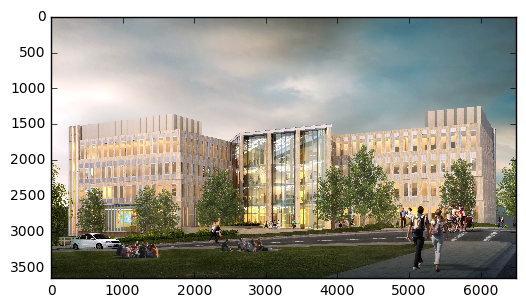

In [2]:
img = scipy.misc.imread("data\luddy.jpg")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [3]:
print(img.shape)
print(img.size)
print(img.dtype)

(3655, 6496, 3)
71228640
uint8


In [4]:
copy_img = img[:, :, 1] 

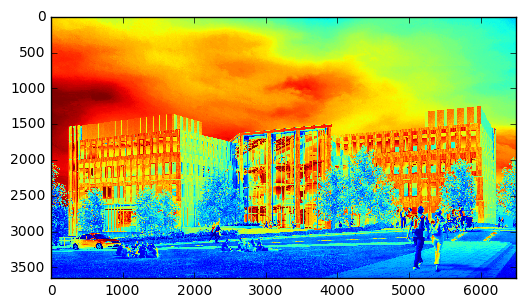

In [5]:
plt.imshow(copy_img)
plt.show()

In [6]:
print(copy_img.shape)

(3655, 6496)


In [7]:
def avg_patch(n):
    
    """
    Takes n random image patches from the file of 100 * 100 size
    and returns the average patch.  
    """
    
    sum_patch = np.zeros((100, 100))
    for i in range(n):
        i = random.randint(100, 3000)
        j = random.randint(100, 6000)
        sum_patch += copy_img[i:i+100, j:j+100]
    sum_patch = sum_patch / n 
    return sum_patch

In [8]:
def getmean(patch):
    
    """
    Takes 100 * 100 patch and 
    return its mean
    """
    
    mean = sum(sum(patch)) / 10000
    return mean

In [9]:
def getvariance(patch, mean):
    
    """
    Takes 100 * 100 patch and
    return its variance
    """
    patch = patch - mean
    var = sum(sum(pow(patch,2))) / 10000
    return var

In [10]:
def getlogll(patch, mean, var):
    
    """
    Takes 100 * 100 patch with its mean and variance
    and return its log-likelihood of the gaussian
    """
    
    logll = -((0.5 * 10000 * math.log(2 * math.pi)) + (0.5 * 10000 * math.log(var)) + sum(sum(pow(patch,2))) / (2 * var))
    return logll

For 2 patches mean variance and log likelihood is
 179.3125 438.49639375 -411233.704119


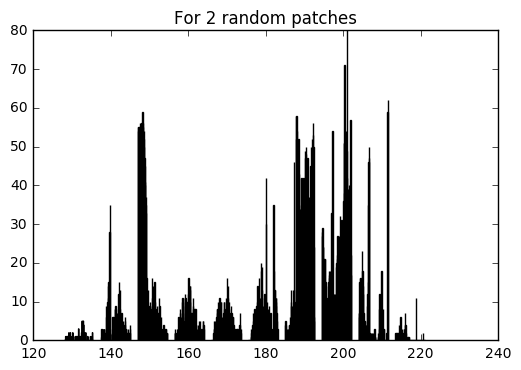

In [19]:
sum_patch = avg_patch(2)
mean = getmean(sum_patch)
var = getvariance(sum_patch, mean)
logll = getlogll(sum_patch, mean, var)
print("For 2 patches mean variance and log likelihood is\n",mean, var, logll)
plt.hist(sum_patch)
plt.title("For 2 random patches")
plt.show()

For 100 patches mean variance and log likelihood is
162.539379 6.12806748436 -21579029.5578


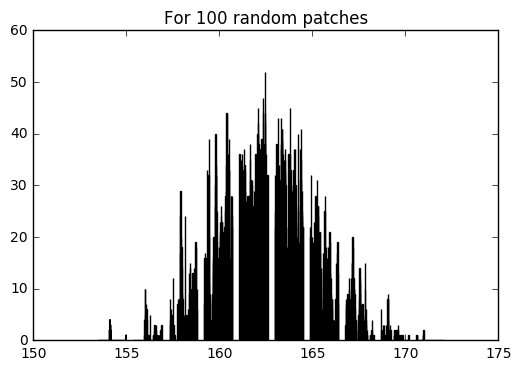

In [13]:
sum_patch = avg_patch(100)
mean = getmean(sum_patch)
var = getvariance(sum_patch, mean)
logll = getlogll(sum_patch, mean, var)
print("For 100 patches mean variance and log likelihood is")
print (mean, var, logll)
plt.hist(sum_patch)
plt.title("For 100 random patches")
plt.show()

For 1000 randomly selected patches from the image negative log likelihood is highest and the histogram also looks most gaussian 

For 1000 patches mean variance and log likelihood is
161.8429584 0.912199224869 -143585125.653


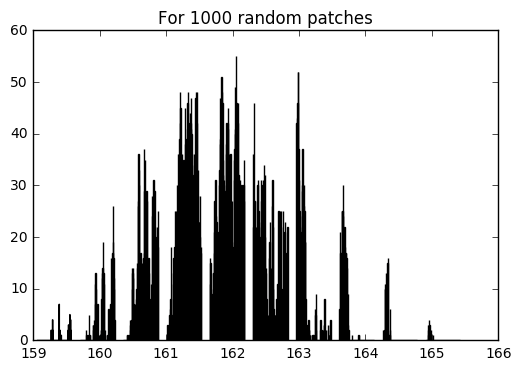

In [14]:
sum_patch = avg_patch(1000)
mean = getmean(sum_patch)
var = getvariance(sum_patch, mean)
logll = getlogll(sum_patch, mean, var)
print("For 1000 patches mean variance and log likelihood is")
print (mean, var, logll)
plt.hist(sum_patch)
plt.title("For 1000 random patches")
plt.show()